# Collaborative Filtering

# Data

https://www.kaggle.com/prajitdatta/movielens-100k-dataset

# Setup

In [51]:
import pandas as pd
import numpy as np
from surprise import SVD, KNNBasic, NormalPredictor, BaselineOnly, CoClustering, SVD
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

In [28]:
plt.style.use("ggplot")

# Load data

In [26]:
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names=r_cols, encoding='latin-1')
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


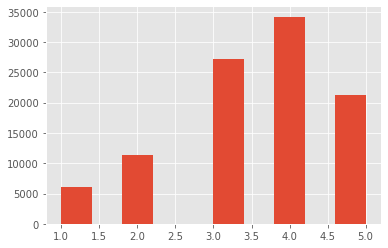

In [29]:
_ = plt.hist(ratings["rating"])

In [34]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings, reader)

In [35]:
trainset, testset = train_test_split(data, test_size=.25)

# Random predictor

In [54]:
algo = NormalPredictor()
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

RMSE: 1.5182
1.5182205986000392
FCP:  0.5006
0.5005836540951722


# User based CF

In [46]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0154
1.0153651297663333
FCP:  0.7095
0.709461582699134


In [45]:
sim_options = {
    'name': 'pearson',
    'user_based': True
}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0106
1.0106404848940638
FCP:  0.7134
0.7133883900669088


# Item based CF

In [47]:
sim_options = {
    'name': 'cosine',
    'user_based': False
}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0306
1.0306399181241648
FCP:  0.5818
0.5818114719755227


In [48]:
sim_options = {
    'name': 'pearson',
    'user_based': False
}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0444
1.044350746615236
FCP:  0.5456
0.5456477865745967


# Model based CF

In [53]:
algo = BaselineOnly(bsl_options={'method': 'als'})
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

Estimating biases using als...
RMSE: 0.9456
0.945604586316232
FCP:  0.7013
0.7012955993618846


In [56]:
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

RMSE: 0.9393
0.9392604841743031
FCP:  0.7027
0.7026846278316268


In [58]:
algo = SVD(biased=False)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

RMSE: 0.9557
0.9556559284548948
FCP:  0.7111
0.7111136223627775


In [60]:
algo = CoClustering(n_cltr_u=10, n_cltr_i=10, random_state=5)
algo.fit(trainset)
predictions = algo.test(testset)
print(accuracy.rmse(predictions))
print(accuracy.fcp(predictions))

RMSE: 0.9855
0.9855416834691926
FCP:  0.6827
0.6826551169056168
